## **Importing Libraries**

In [1]:
%pip install contractions
%pip install nltk
%pip install --upgrade matplotlib
%pip install autocorrect
%pip install -U scikit-learn
%pip install pandas
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

#Libraries for general purpose
import matplotlib.pyplot as plt


#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **EDA**

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('cyberbullying_tweets.csv')
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [4]:
%pip install plotly-express
%pip install --upgrade nbformat
import plotly.express as px

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
fig = px.bar(df.cyberbullying_type.value_counts(),
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             custom_data=[df.cyberbullying_type.value_counts()])
fig.update_traces(hovertemplate='<br><b>Total: </b>%{customdata[0]}')
fig.update_layout(title='Cyberbullying types',
                 template='simple_white',
                 hovermode='x unified',
                 xaxis=dict(title='Type'),
                 yaxis=dict(title='Count'),
                 showlegend=False)
fig.show()

In [6]:
for cyber_type in df.cyberbullying_type.unique():

    top50_word = df.tweet_text[df.cyberbullying_type==cyber_type].str.split(expand=True).stack().value_counts()[:50]

    fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')

    fig.update_layout(title=f"Top 50 words for {cyber_type}",
                     template='simple_white',
                     hovermode='x unified')
    fig.show()




# **Dataset Preprocessing**

In [7]:
df['cyberbullying_type'].value_counts()

# Renaming Categories
df = df.rename(columns={'tweet_text': 'text'})
df = df[df["cyberbullying_type"]!="other_cyberbullying"]

# Converting categories into numbers
df['cyberbullying_type'].replace({"religion": 1, "gender": 2, "age": 3, "ethnicity": 4, "not_cyberbullying": 0}, inplace=True)

df
df['cyberbullying_type'].value_counts()
# df.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_21296\3722524753.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\User\AppData\Local\Temp\ipykernel_21296\3722524753.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



cyberbullying_type
1    7998
3    7992
2    7973
4    7961
0    7945
Name: count, dtype: int64

In [8]:
#Text cleaning
import re, string
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


# ------------------------------------------------------------------------------
# 1. Overview
text = df['text']
print("\nOriginal text:")
print(text)

# ------------------------------------------------------------------------------
# 2. Remove links, mentions
count = 0
for index, row in df.iterrows():
  text = row['text']

  if re.search(r"(?:\@|https?\://)\S+", text):
    print("\nOriginal text:")
    print(text)
    cleaned_text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    print("Preprocessed text:")
    print(cleaned_text)
    count += 1

    if count == 10:
      break

pattern = r"(?:\@|https?\://)\S+"
df['cleaned_text'] = [re.sub(pattern, "", text) for text in df['text']]
df
# ------------------------------------------------------------------------------



Original text:
0        In other words #katandandre, your food was cra...
1        Why is #aussietv so white? #MKR #theblock #ImA...
2        @XochitlSuckkks a classy whore? Or more red ve...
3        @Jason_Gio meh. :P  thanks for the heads up, b...
4        @RudhoeEnglish This is an ISIS account pretend...
                               ...                        
47687    Black ppl aren't expected to do anything, depe...
47688    Turner did not withhold his disappointment. Tu...
47689    I swear to God. This dumb nigger bitch. I have...
47690    Yea fuck you RT @therealexel: IF YOURE A NIGGE...
47691    Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...
Name: text, Length: 39869, dtype: object

Original text:
@XochitlSuckkks a classy whore? Or more red velvet cupcakes?
Preprocessed text:
 a classy whore? Or more red velvet cupcakes?

Original text:
@Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.
Preprocessed text:
 meh. :P  tha

,text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",0,"In other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,Why is #aussietv so white? #MKR #theblock #ImA...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,a classy whore? Or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,"meh. :P thanks for the heads up, but not too..."
4,@RudhoeEnglish This is an ISIS account pretend...,0,This is an ISIS account pretending to be a Ku...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,"Black ppl aren't expected to do anything, depe..."
47688,Turner did not withhold his disappointment. Tu...,4,Turner did not withhold his disappointment. Tu...
47689,I swear to God. This dumb nigger bitch. I have...,4,I swear to God. This dumb nigger bitch. I have...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,Yea fuck you RT IF YOURE A NIGGER FUCKING UNF...


In [9]:
# 3. Remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'

count = 0
for index, row in df.iterrows():
  text = row['cleaned_text']

  if re.search(r'[^\x00-\x7f]', text):
    print("\nOriginal text:")
    print(text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    print("Preprocessed text:")
    print(text)
    count += 1

    if count == 10:
      break

df['cleaned_text'] = [re.sub(r'[^\x00-\x7f]', r'', text) for text in df['cleaned_text']]
df




Original text:
RT  Turkish state has killed 241 children in last 11 years   #news  ##GoogleÇeviriciTopluluğuKürtçeyideE…
Preprocessed text:
RT  Turkish state has killed 241 children in last 11 years   #news  ##GoogleeviriciTopluluuKrteyideE

Original text:
Kids Love😘❤ @ Mohamad Bin Zayed City مدينة محمد بن زايد 
Preprocessed text:
Kids Love @ Mohamad Bin Zayed City     

Original text:
 Isso é bullying! 
Preprocessed text:
 Isso  bullying! 

Original text:
 poise, odiei aquilo ele sofria bullying de meninas porisso matou muitas meninas, mais mesmo assim aquelas crianças nao tinham culpa
Preprocessed text:
 poise, odiei aquilo ele sofria bullying de meninas porisso matou muitas meninas, mais mesmo assim aquelas crianas nao tinham culpa

Original text:
aposto que vou sofrer bullying depois do meu próximo tweet
Preprocessed text:
aposto que vou sofrer bullying depois do meu prximo tweet

Original text:
 it starts Thursday. My classes are canceled for tomorrow tho😌.
Preprocessed text:
 it

,text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",0,"In other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,Why is #aussietv so white? #MKR #theblock #ImA...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,a classy whore? Or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,"meh. :P thanks for the heads up, but not too..."
4,@RudhoeEnglish This is an ISIS account pretend...,0,This is an ISIS account pretending to be a Ku...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,"Black ppl aren't expected to do anything, depe..."
47688,Turner did not withhold his disappointment. Tu...,4,Turner did not withhold his disappointment. Tu...
47689,I swear to God. This dumb nigger bitch. I have...,4,I swear to God. This dumb nigger bitch. I have...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,Yea fuck you RT IF YOURE A NIGGER FUCKING UNF...


In [10]:
# 4. Lowercase
df['cleaned_text'] = df['cleaned_text'].str.lower()
df

,text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",0,"in other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,why is #aussietv so white? #mkr #theblock #ima...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,a classy whore? or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,"meh. :p thanks for the heads up, but not too..."
4,@RudhoeEnglish This is an ISIS account pretend...,0,this is an isis account pretending to be a ku...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,"black ppl aren't expected to do anything, depe..."
47688,Turner did not withhold his disappointment. Tu...,4,turner did not withhold his disappointment. tu...
47689,I swear to God. This dumb nigger bitch. I have...,4,i swear to god. this dumb nigger bitch. i have...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,yea fuck you rt if youre a nigger fucking unf...


In [11]:
# 5. Remove contractions
df
contractions_dict = {
    "can't": "can not",
    "n't": " not",
    "'re": " are",
    "'s": " is",
    "'d": " would",
    "'ll": " will",
    "'t": " not",
    "'ve": " have",
    "'m": " am",
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

contraction_patterns = {rf"{key}": value for key, value in contractions_dict.items()}

count = 0

for index, row in df.iterrows():
  text = row['cleaned_text']
  if any(re.search(pattern, text) for pattern in contraction_patterns.keys()):
    original_text = text
    expanded_text = text

    for pattern, replacement in contraction_patterns.items():
      expanded_text = re.sub(pattern, replacement, expanded_text)
    print("\nOriginal text:")
    print(original_text)
    print("Preprocessed text:")
    print(expanded_text)
    count += 1
    if count == 10:
      break

def expand_contractions(text):
    # Iterate over each contraction pattern and replace them in the text
    for pattern, replacement in contraction_patterns.items():
        text = re.sub(pattern, replacement, text)

    return text

df['cleaned_text'] = df['cleaned_text'].apply(expand_contractions)
df


Original text:
best pick up line? hi, you're cute... ?: i love how people call james potter is a bully. - mypatronusisyou: 
Preprocessed text:
best pick up line? hi, you are cute... ?: i love how people call james potter is a bully. - mypatronusisyou: 

Original text:
 eek. i can't stand split keyboards. doesn't work well with mmos.
Preprocessed text:
 eek. i cannot stand split keyboards. does not work well with mmos.

Original text:
you know there are people out there who like  but don't listen to old school.
Preprocessed text:
you know there are people out there who like  but do not listen to old school.

Original text:
  not the first time it's happened. that was probably the worst though.
Preprocessed text:
  not the first time it is happened. that was probably the worst though.

Original text:
the thing about uber is, even if it wasn't a horrible, sexist, shitty company, i would still be against it.
Preprocessed text:
the thing about uber is, even if it was not a horrible, sexist

,text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",0,"in other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,why is #aussietv so white? #mkr #theblock #ima...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,a classy whore? or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,"meh. :p thanks for the heads up, but not too..."
4,@RudhoeEnglish This is an ISIS account pretend...,0,this is an isis account pretending to be a ku...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,"black ppl are not expected to do anything, dep..."
47688,Turner did not withhold his disappointment. Tu...,4,turner did not withhold his disappointment. tu...
47689,I swear to God. This dumb nigger bitch. I have...,4,i swear to god. this dumb nigger bitch. i have...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,yea fuck you rt if youre a nigger fucking unf...


In [12]:
# 6. Remove stopwords and punctuations
punctuation_list = string.punctuation
translation_table = str.maketrans('', '', punctuation_list)

df['cleaned_text'] = df['cleaned_text'].str.translate(translation_table)
df

stop_words = set(stopwords.words('english'))
for index, row in df.iterrows():
    words = row['cleaned_text'].split()  # Split text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Filter out stopwords
    df.at[index, 'cleaned_text'] = ' '.join(filtered_words)

df

,text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",0,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,meh p thanks heads concerned another angry dud...
4,@RudhoeEnglish This is an ISIS account pretend...,0,isis account pretending kurdish account like i...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,black ppl expected anything depended anything ...
47688,Turner did not withhold his disappointment. Tu...,4,turner withhold disappointment turner called c...
47689,I swear to God. This dumb nigger bitch. I have...,4,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,yea fuck rt youre nigger fucking unfollow fuck...


In [13]:
# 7. Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r"\s+", " ", text)

df['cleaned_text'] = df['cleaned_text'].apply(remove_mult_spaces)
df


,text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",0,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,meh p thanks heads concerned another angry dud...
4,@RudhoeEnglish This is an ISIS account pretend...,0,isis account pretending kurdish account like i...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,black ppl expected anything depended anything ...
47688,Turner did not withhold his disappointment. Tu...,4,turner withhold disappointment turner called c...
47689,I swear to God. This dumb nigger bitch. I have...,4,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,yea fuck rt youre nigger fucking unfollow fuck...


In [14]:
# 8. Lemmatization
def lemmatize_text(text):
    lm = WordNetLemmatizer()
    lemmatized_text = ' '.join([lm.lemmatize(word) for word in text.split()])
    return lemmatized_text

count = 0
for index, row in df.iterrows():
    text = row['cleaned_text']

    lemmatized_text = lemmatize_text(text)

    print("\nOriginal text:")
    print(text)
    print("Lemmatized text:")
    print(lemmatized_text)

    count += 1

    if count == 10:
        break

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_text)
df


Original text:
words katandandre food crapilicious mkr
Lemmatized text:
word katandandre food crapilicious mkr

Original text:
aussietv white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc
Lemmatized text:
aussietv white mkr theblock imacelebrityau today sunrise studio10 neighbour wonderlandten etc

Original text:
classy whore red velvet cupcakes
Lemmatized text:
classy whore red velvet cupcake

Original text:
meh p thanks heads concerned another angry dude twitter
Lemmatized text:
meh p thanks head concerned another angry dude twitter

Original text:
isis account pretending kurdish account like islam lies
Lemmatized text:
isi account pretending kurdish account like islam lie

Original text:
yes test god good bad indifferent weird whatever proves gods existence
Lemmatized text:
yes test god good bad indifferent weird whatever prof god existence

Original text:
itu sekolah ya bukan tempat bully ga jauh kaya neraka
Lemmatized text:
itu sekolah ya bukan t

,text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",0,word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,meh p thanks head concerned another angry dude...
4,@RudhoeEnglish This is an ISIS account pretend...,0,isi account pretending kurdish account like is...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,black ppl expected anything depended anything ...
47688,Turner did not withhold his disappointment. Tu...,4,turner withhold disappointment turner called c...
47689,I swear to God. This dumb nigger bitch. I have...,4,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,yea fuck rt youre nigger fucking unfollow fuck...


In [15]:
# 9. Checking for duplicates and null
duplicates_count = df["cleaned_text"].duplicated().sum()
null_count = df["cleaned_text"].isnull().sum()

print("Number of duplicate entries in 'cleaned_text' column:", duplicates_count)
print("Number of null values in 'cleaned_text' column:", null_count)

Number of duplicate entries in 'cleaned_text' column: 951
Number of null values in 'cleaned_text' column: 0


In [16]:
# 10. Handling duplicates
df.drop_duplicates("cleaned_text", inplace=True)

# **EDA after Preprocessing**

In [17]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


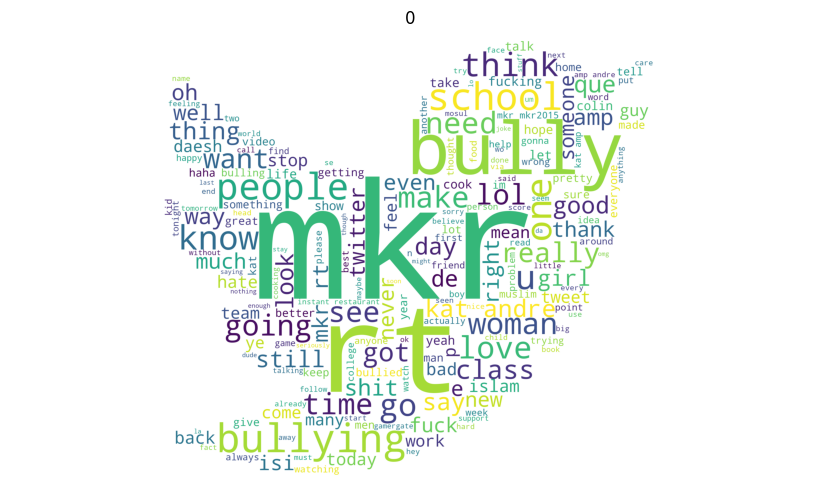

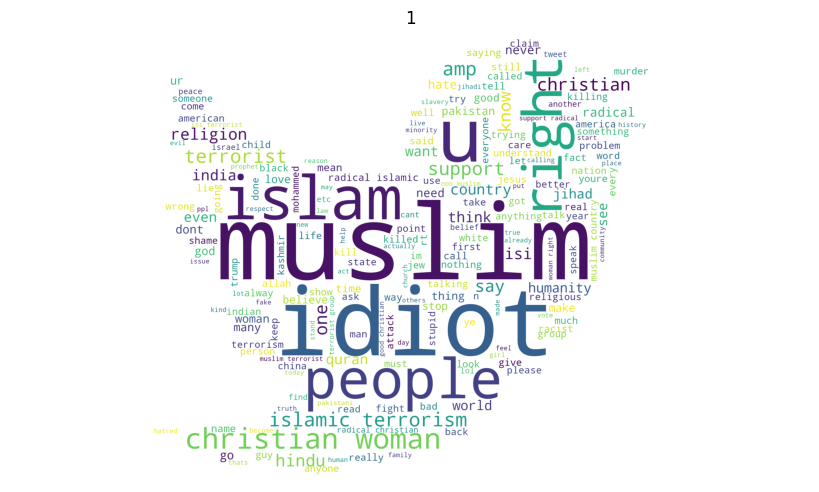

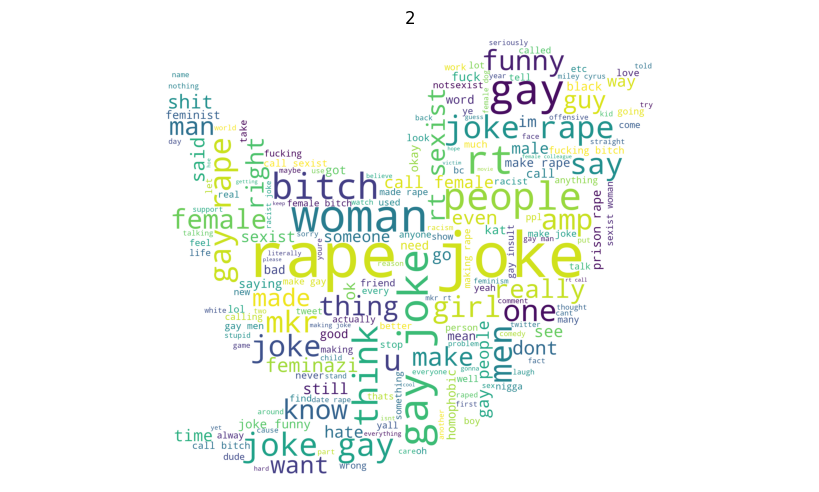

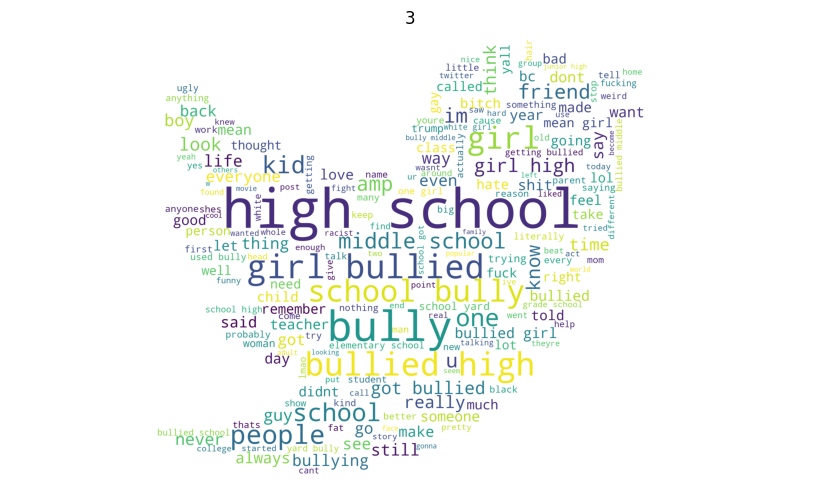

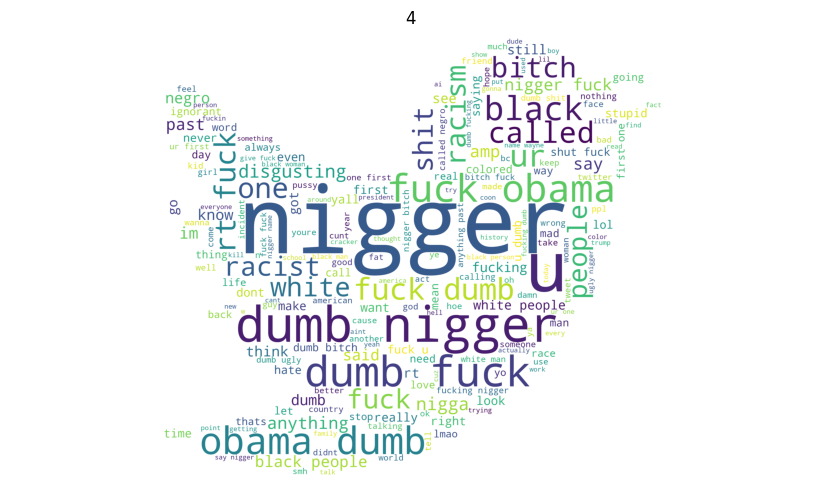

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image
from sklearn.preprocessing import LabelEncoder

mask = np.array(Image.open('twitter.png'))

def transform_zeros(val):
    if val == 0:
       return 255
    else:
       return val

maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))
mask = maskable_image

lenc = LabelEncoder()
df.cyberbullying_type = lenc.fit_transform(df.cyberbullying_type)

for c in range(len(lenc.classes_)):
    string = ""
    for i in df[df.cyberbullying_type == c].cleaned_text.values:
        string = string + " " + i.strip()

    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                mask = mask,
                min_font_size = 10)
    wordcloud.generate(string)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

# **Splitting into training and test**

In [19]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
1    7954
3    7886
4    7783
0    7667
2    7628
Name: count, dtype: int64

In [20]:
# Combining 1,2,3,4 labels
new_label = 1  # Label to merge into
df['cyberbullying_type'] = df['cyberbullying_type'].apply(lambda x: new_label if x in [1, 2, 3, 4] else x)

df['cyberbullying_type'].value_counts()

cyberbullying_type
1    31251
0     7667
Name: count, dtype: int64

In [21]:
X = df['cleaned_text']
y = df['cyberbullying_type']

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

# Display value counts of the target variable in the training and testing sets
print("Training set - y_train value counts:")
print(y_train.value_counts())

print("\nTesting set - y_test value counts:")
print(y_test.value_counts())


Training set - y_train value counts:
cyberbullying_type
1    21875
0     5367
Name: count, dtype: int64

Testing set - y_test value counts:
cyberbullying_type
1    9376
0    2300
Name: count, dtype: int64


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
print("No. of feature words: ",len(vectorizer.get_feature_names_out()))

No. of feature words:  34004


In [24]:
X_train = vectorizer.transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [25]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [26]:
from imblearn.under_sampling import RandomUnderSampler

# Perform random sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("\nAfter random undersampling:")
print("Class distribution in y_train_rus:")
print(pd.Series(y_train_rus).value_counts())


After random undersampling:
Class distribution in y_train_rus:
0    5367
1    5367
Name: count, dtype: int64


# **Logistic Regression Model**

In [ ]:
# -----------------------------Robert---------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train_rus, y_train_rus)

LogisticRegression()

## **_Predictions_**

In [ ]:
# evaluate the classifier on the test set
y_pred = log_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
results_df = pd.DataFrame({
    'cyberbully_type': y_test,  # Actual cyberbully types from the test set
    'predicted_cyberbully_type': y_pred  # Predicted cyberbully types from your classifier
})

# Display the DataFrame with actual and predicted cyberbully types
print(results_df)

       cyberbully_type  predicted_cyberbully_type
0                    1                          1
1                    1                          1
2                    1                          1
3                    1                          1
4                    1                          1
...                ...                        ...
11671                1                          0
11672                1                          1
11673                1                          1
11674                1                          1
11675                1                          1

[11676 rows x 2 columns]


## **_Accuracy Score_**

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8997088043850634


## **_Confusion Matrix_**

[[2101  199]
 [ 972 8404]]


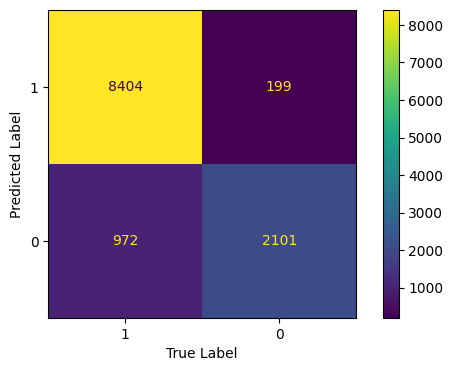

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# cm

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

# **_Classification Report_**

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.91      0.78      2300
           1       0.98      0.90      0.93      9376

    accuracy                           0.90     11676
   macro avg       0.83      0.90      0.86     11676
weighted avg       0.92      0.90      0.90     11676



In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Train Accuracy  : {:.2f} %".format(accuracy_score(y_train_rus, log_model.predict(X_train_rus))*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
print("Precision       : {:.2f} %".format(precision_score(y_test, y_pred)*100))
print("Recall          : {:.2f} %".format(recall_score(y_test, y_pred)*100))
print("F1 Score        : {:.2f} %".format(f1_score(y_test, y_pred)*100))

Train Accuracy  : 94.08 %
Test Accuracy   : 89.97 %
Precision       : 97.69 %
Recall          : 89.63 %
F1 Score        : 93.49 %


# **_Tuning_** **Logistic Regression**

In [36]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 500, 1000]
}

In [37]:
grid = GridSearchCV(log_model, param_grid = param_grid, scoring="accuracy",
                   cv = 3)

In [38]:
grid.fit(X_train_rus,y_train_rus)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [39]:
#\ examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))

GridSearch CV best score : 0.9035


Parameters that give the best results : 

 {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [40]:
# pick best estimator
lg = grid.best_estimator_
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n',lg)



Estimator that was chosen by the search : 

 LogisticRegression(C=1, penalty='l1', solver='liblinear')


Train Accuracy  : 91.75 %
Test Accuracy   : 89.41 %
Precision       : 97.80 %
Recall          : 88.80 %
F1 Score        : 93.09 %


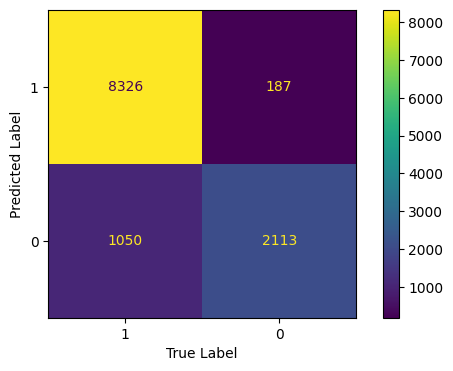

In [41]:
# #predict the results for test
# test_pred = lg.predict(X_test)
# #test the accuracy
# print("Train Accuracy  : {:.2f} %".format(accuracy_score(lg.predict(X_train_rus), y_train_rus)*100))
# print("Test Accuracy   : {:.2f} %".format(accuracy_score(lg.predict(X_test), y_test)*100))
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')


#predict the results for test
test_pred = lg.predict(X_test)
#test the accuracy
print("Train Accuracy  : {:.2f} %".format(accuracy_score(y_train_rus,lg.predict(X_train_rus))*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(y_test, test_pred)*100))
print("Precision       : {:.2f} %".format(precision_score(y_test, test_pred)*100))
print("Recall          : {:.2f} %".format(recall_score(y_test, test_pred)*100))
print("F1 Score        : {:.2f} %".format(f1_score(y_test, test_pred)*100))

cm = confusion_matrix(y_test, test_pred)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(test_pred,y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()



In [42]:
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.92      0.77      2300
           1       0.98      0.89      0.93      9376

    accuracy                           0.89     11676
   macro avg       0.82      0.90      0.85     11676
weighted avg       0.92      0.89      0.90     11676



# **Random Forest Model**

In [27]:
# LOH JUN KIT #
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_rus, y_train_rus)

RandomForestClassifier()

## **_Predictions_**

In [29]:
results_df = pd.DataFrame({
    'cyberbully_type': y_test,  # Actual cyberbully types from the test set
    'predicted_cyberbully_type': rf_pred  # Predicted cyberbully types from your classifier
})

# Display the DataFrame with actual and predicted cyberbully types
print(results_df)

       cyberbully_type  predicted_cyberbully_type
0                    1                          0
1                    1                          1
2                    1                          1
3                    1                          1
4                    1                          1
...                ...                        ...
11671                1                          0
11672                1                          0
11673                1                          1
11674                1                          1
11675                1                          1

[11676 rows x 2 columns]


## **_Accuracy Score_**

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
rf_acc = accuracy_score(y_test, rf_pred)
print("Accuracy:", rf_acc)

Accuracy: 0.9174073312778349


## **_Confusion Matrix_**

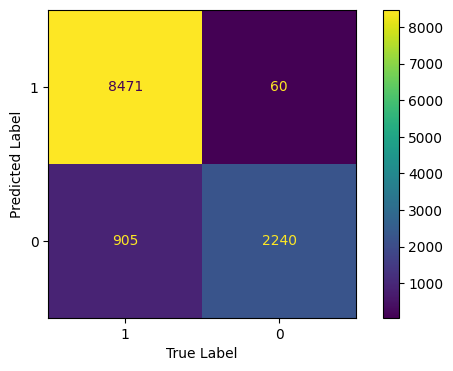

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_cm = confusion_matrix(y_test, rf_pred)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(rf_pred,y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

## **_Classification Report_**

In [9]:
from sklearn.metrics import classification_report
rf_pred = rf_clf.predict(X_test)
print('Classification Report for Random Forest:\n',classification_report(y_test, rf_pred))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.97      0.82      2300
           1       0.99      0.90      0.95      9376

    accuracy                           0.92     11676
   macro avg       0.85      0.94      0.88     11676
weighted avg       0.94      0.92      0.92     11676



In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Train Accuracy  : {:.2f} %".format(accuracy_score(y_train_rus, rf_clf.predict(X_train_rus))*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(y_test, rf_pred)*100))
print("Precision       : {:.2f} %".format(precision_score(y_test, rf_pred)*100))
print("Recall          : {:.2f} %".format(recall_score(y_test, rf_pred)*100))
print("F1 Score        : {:.2f} %".format(f1_score(y_test, rf_pred)*100))


Train Accuracy  : 99.99 %
Test Accuracy   : 91.74 %
Precision       : 99.30 %
Recall          : 90.35 %
F1 Score        : 94.61 %


# **_Tuning_** **Random Forest**

In [33]:
param_gridRF = {
    'n_estimators': [25, 50, 100],
    'max_features': ['sqrt', None],
    'max_depth': [1, 2],
    'max_leaf_nodes': [2, 3],
}

In [34]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(rf_clf, param_grid=param_gridRF, scoring="accuracy",
                   cv = 3)

In [35]:
rf_grid.fit(X_train_rus, y_train_rus)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2], 'max_features': ['sqrt', None],
                         'max_leaf_nodes': [2, 3],
                         'n_estimators': [25, 50, 100]},
             scoring='accuracy')

In [4]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(rf_grid.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (rf_grid.best_params_))

GridSearch CV best score : 0.8454


Parameters that give the best results : 

 {'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 100}


In [37]:
# pick best estimator
rf = rf_grid.best_estimator_
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n',rf)



Estimator that was chosen by the search : 

 RandomForestClassifier(max_depth=2, max_leaf_nodes=3)


Train Accuracy  : 87.78 %
Test Accuracy   : 84.16 %
Precision       : 98.01 %
Recall          : 81.93 %
F1 Score        : 89.25 %


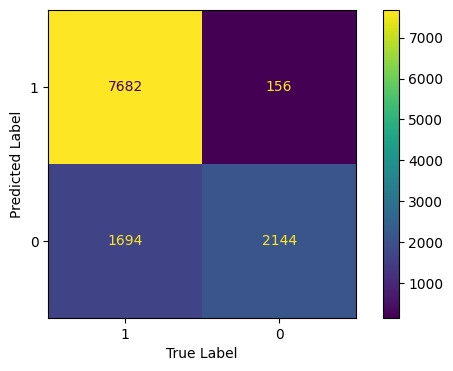

In [7]:
#predict the results for test
rf_test_pred = rf.predict(X_test)
#test the accuracy
print("Train Accuracy  : {:.2f} %".format(accuracy_score(y_train_rus,rf.predict(X_train_rus))*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(y_test, rf_test_pred)*100))
print("Precision       : {:.2f} %".format(precision_score(y_test, rf_test_pred)*100))
print("Recall          : {:.2f} %".format(recall_score(y_test, rf_test_pred)*100))
print("F1 Score        : {:.2f} %".format(f1_score(y_test, rf_test_pred)*100))

cm = confusion_matrix(y_test, rf_test_pred)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(rf_test_pred,y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

In [11]:
report = classification_report(y_test, rf_test_pred)
print(report)


              precision    recall  f1-score   support

           0       0.56      0.93      0.70      2300
           1       0.98      0.82      0.89      9376

    accuracy                           0.84     11676
   macro avg       0.77      0.88      0.80     11676
weighted avg       0.90      0.84      0.85     11676



# **Support Vector Machine Model**

In [ ]:
## Liew Jer Harng ##
from sklearn.svm import SVC
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train_rus, y_train_rus)

Train Accuracy  : 87.78 %
Test Accuracy   : 84.16 %
Precision       : 98.01 %
Recall          : 81.93 %
F1 Score        : 89.25 %


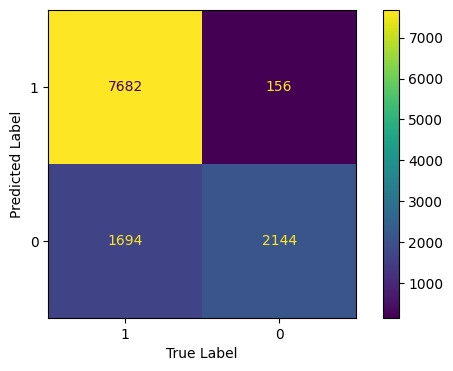

In [ ]:
#predict the results for test
rf_test_pred = rf.predict(X_test)
#test the accuracy
print("Train Accuracy  : {:.2f} %".format(accuracy_score(y_train_rus,rf.predict(X_train_rus))*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(y_test, rf_test_pred)*100))
print("Precision       : {:.2f} %".format(precision_score(y_test, rf_test_pred)*100))
print("Recall          : {:.2f} %".format(recall_score(y_test, rf_test_pred)*100))
print("F1 Score        : {:.2f} %".format(f1_score(y_test, rf_test_pred)*100))

cm = confusion_matrix(y_test, rf_test_pred)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(rf_test_pred,y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

## **_Predictions_**

In [ ]:
# Prediction
svm_predictions  = svm_model_linear.predict(X_test)
svm_predictions

array([3, 4, 3, ..., 3, 1, 4])

## **_Accuracy Score_**

In [1]:
# Accuracy
svm_accuracy = svm_model_linear.accuracy_score(X_test, svm_predictions)
print("Accuracy: ",svm_accuracy)

Accuracy:  0.8922324758281232


## **_Confusion Matrix_**

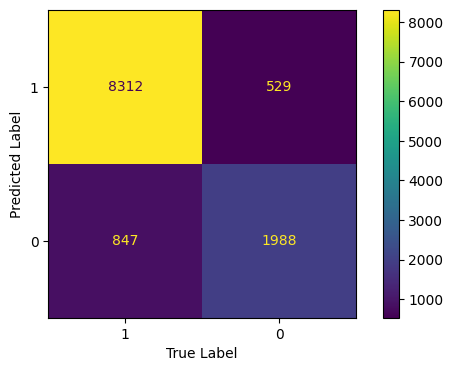

In [18]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
svm_cm = confusion_matrix(y_test, svm_predictions)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(svm_predictions,y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()


## **_Classification Report_**

In [19]:
# Classification report
from sklearn.metrics import classification_report
svm_report = classification_report(y_test, svm_predictions)
print(svm_report)


              precision    recall  f1-score   support
                                                     
           0       0.67      0.91      0.78      2300
           1       0.94      0.91      0.92      9376
                                                     
    accuracy                           0.89     11676
   macro avg       0.81      0.91      0.85     11676
weighted avg       0.89      0.90      0.90     11676


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Train Accuracy  : {:.2f} %".format(accuracy_score(y_train_rus, svm_model_linear.predict(X_train_rus))*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
print("Precision       : {:.2f} %".format(precision_score(y_test, y_pred)*100))
print("Recall          : {:.2f} %".format(recall_score(y_test, y_pred)*100))
print("F1 Score        : {:.2f} %".format(f1_score(y_test, y_pred)*100))

Train Accuracy  : 91.17 %
Test Accuracy   : 89.22 %
Precision       : 94.31 %
Recall          : 90.66 %
F1 Score        : 92.48 %


# **_Tuning_** **SVM**


In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf','linear']
}

In [ ]:
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, scoring='accuracy', cv=3)

In [ ]:
grid_search.fit(X_train_rus, y_train_rus)

In [1]:
# best model
# parameters of the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))

Parameters that give the best results : 

 {'C': 10, 'gamma': 0.1, 'kernel': rbf}


GridSearch CV best score : 0.8873


Train Accuracy  : 92.42 %
Test Accuracy   : 86.65 %
Precision       : 91.92 %
Recall          : 90.76 %
F1 Score        : 92.48 %


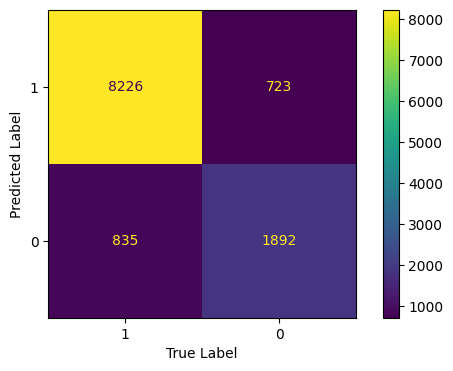

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#predict the results for test
best_svm = grid_search.best_estimator_
test_pred = best_svm.predict(X_test)
#test the accuracy

print("Train Accuracy  : {:.2f} %".format(accuracy_score(y_train_rus,best_svm.predict(X_train_rus))*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(y_test, test_pred)*100))
print("Precision       : {:.2f} %".format(precision_score(y_test, test_pred)*100))
print("Recall          : {:.2f} %".format(recall_score(y_test, test_pred)*100))
print("F1 Score        : {:.2f} %".format(f1_score(y_test, test_pred)*100))


cm = confusion_matrix(y_test, test_pred)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(test_pred,y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()



In [26]:
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support
                                                     
           0       0.72      0.89      0.77      2300
           1       0.92      0.91      0.91      9376
                                                     
    accuracy                           0.87     11676
   macro avg       0.82      0.90      0.84     11676
weighted avg       0.89      0.91      0.89     11676


# **Naive Bayes Model**

In [27]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
nbclf = MultinomialNB()

# Train the classifier on the training data
nbclf.fit(X_train_rus, y_train_rus)

# Predict the labels of the test data
nb_pred = nbclf.predict(X_test)


# **_Accuracy Score_**

In [28]:
# Evaluate the accuracy of the classifier
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, nb_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8929427886262419


## **_Confusion Matrix_**

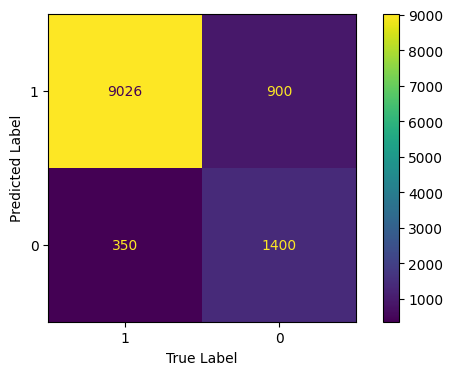

In [29]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
nb_cm = confusion_matrix(y_test, nb_pred)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(nb_pred,y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()


## **_Classification Report_**

In [30]:
# Print the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69      2300
           1       0.91      0.96      0.94      9376

    accuracy                           0.89     11676
   macro avg       0.85      0.79      0.81     11676
weighted avg       0.89      0.89      0.89     11676



In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Train Accuracy  : {:.2f} %".format(accuracy_score(y_train_rus, nbclf.predict(X_train_rus))*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(y_test, nb_pred)*100))
print("Precision       : {:.2f} %".format(precision_score(y_test, nb_pred)*100))
print("Recall          : {:.2f} %".format(recall_score(y_test, nb_pred)*100))
print("F1 Score        : {:.2f} %".format(f1_score(y_test, nb_pred)*100))

Train Accuracy  : 88.87 %
Test Accuracy   : 89.29 %
Precision       : 90.93 %
Recall          : 96.27 %
F1 Score        : 93.52 %


# **_Tuning_** **Naive Bayes**

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=nbclf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_rus, y_train_rus)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

In [33]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the classifier with the best parameters
best_nb_clf = MultinomialNB(alpha=best_params['alpha'])
best_nb_clf.fit(X_train_rus, y_train_rus)

# Predict the labels for the test data
nbpred = best_nb_clf.predict(X_test)


Best Parameters: {'alpha': 0.1}
Best Score: 0.8176813612353179


Train Accuracy  : 94.75 %
Test Accuracy   : 88.51 %
Precision       : 92.65 %
Recall          : 93.07 %
F1 Score        : 92.86 %


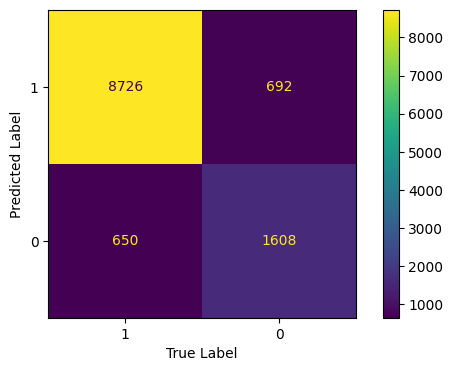

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Print the results
print("Train Accuracy  : {:.2f} %".format(accuracy_score(y_train_rus, best_nb_clf.predict(X_train_rus))*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(y_test, nbpred)*100))
print("Precision       : {:.2f} %".format(precision_score(y_test, nbpred)*100))
print("Recall          : {:.2f} %".format(recall_score(y_test, nbpred)*100))
print("F1 Score        : {:.2f} %".format(f1_score(y_test, nbpred)*100))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, nbpred)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(nbpred,y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

In [35]:
# Print the classification report
report = classification_report(y_test, nbpred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      2300
           1       0.93      0.93      0.93      9376

    accuracy                           0.89     11676
   macro avg       0.82      0.81      0.82     11676
weighted avg       0.88      0.89      0.88     11676

